# In this notebook, we will be practicing image classification using furniture datasets that have been split into 5 classifications: TV, Table, Fridge, Chair, Cabinet

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *

## Preprocessing with ImageDataGenerator

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

preprocess_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Load Training Data

In [3]:
train_generator = preprocess_datagen.flow_from_directory(
    './furniture_dataset/train',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
)

Found 10500 images belonging to 5 classes.


## Ensuring that Generator is Working as Properly

Train Images Shape: (64, 224, 224, 3)
Train Labels Shape: (64, 5)


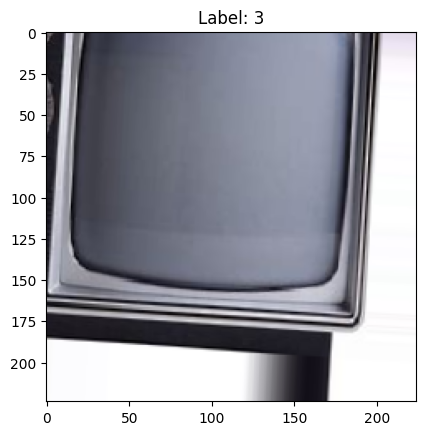

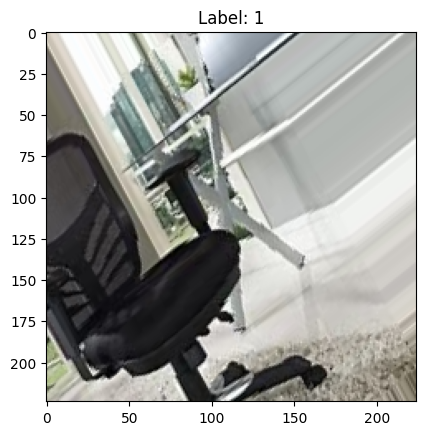

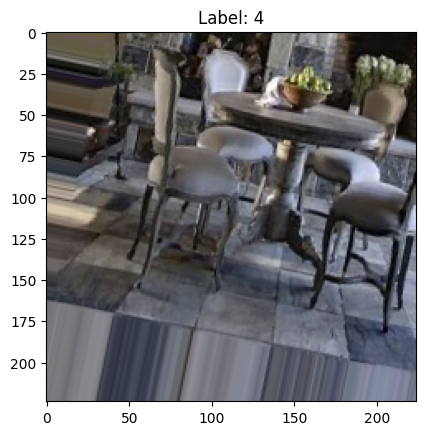

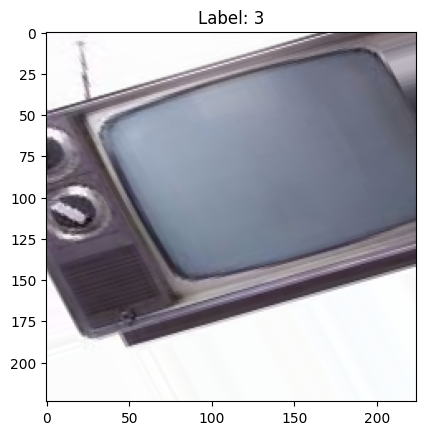

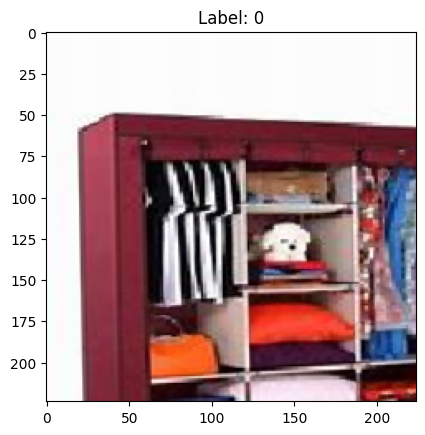

165


In [6]:
# Get one batch of data
train_images, train_labels = next(train_generator)

# Check the shape of the images and labels
print(f"Train Images Shape: {train_images.shape}")
print(f"Train Labels Shape: {train_labels.shape}")

# Optionally, visualize some images and their corresponding labels
import matplotlib.pyplot as plt

# Display the first 5 images and labels
for i in range(5):
    plt.imshow(train_images[i])
    plt.title(f"Label: {np.argmax(train_labels[i])}")
    plt.show()

print(len(train_generator))

## Load Validation Data

In [7]:
valid_generator = preprocess_datagen.flow_from_directory(
    './furniture_dataset/valid',
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
)

Found 2000 images belonging to 5 classes.


## Ensuring that Validation Generator Works

Validation Images Shape: (64, 224, 224, 3)
Validation Labels Shape: (64, 5)


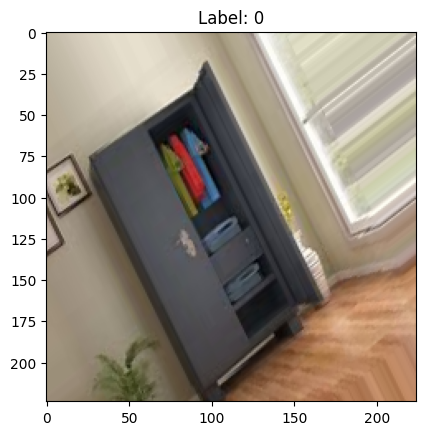

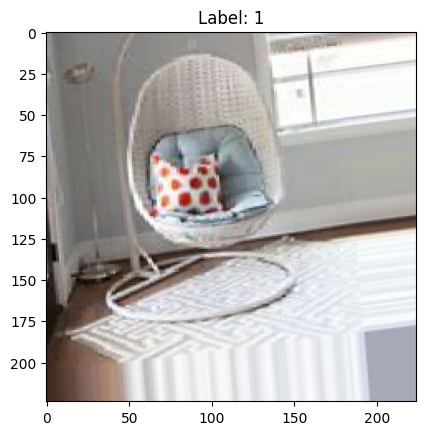

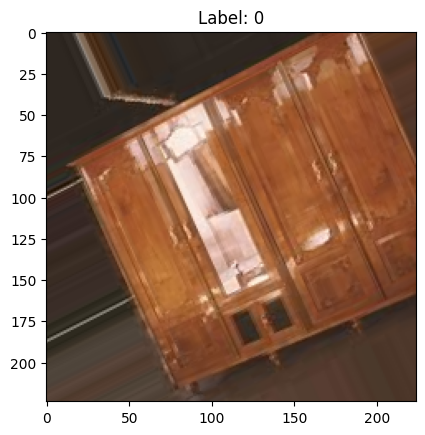

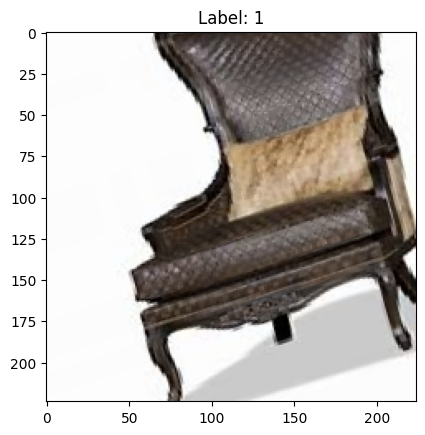

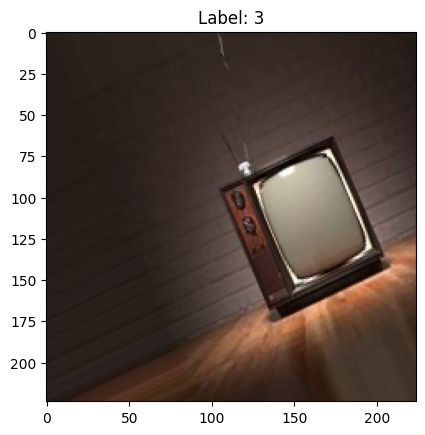

32


In [8]:
# Get one batch of data
valid_images, valid_labels = next(valid_generator)

# Check the shape of the images and labels
print(f"Validation Images Shape: {valid_images.shape}")
print(f"Validation Labels Shape: {valid_labels.shape}")

# Optionally, visualize some images and their corresponding labels
for i in range(5):
    plt.imshow(valid_images[i])
    plt.title(f"Label: {np.argmax(valid_labels[i])}")
    plt.show()

print(len(valid_generator))

## Load Testing Data

In [9]:
test_generator = preprocess_datagen.flow_from_directory(
    './furniture_dataset/test',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
)

Found 2500 images belonging to 5 classes.


## Pretrained Model

In [10]:
from tensorflow.keras.applications import ResNet50V2

pretrained_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=[224,224,3])
pretrained_model.trainable = False;

for layer in pretrained_model.layers[-10:]:
    layers.trainable = True;

## Classification Model

In [11]:
model = keras.Sequential([
    pretrained_model,
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


## Fit Model

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=valid_generator,
    # callbacks=[early_stop],
)

Epoch 1/50


C:\Users\karne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


165/165 ━━━━━━━━━━━━━━━━━━━━ 705s 4s/step - accuracy: 0.8408 - loss: 2.2130 - val_accuracy: 0.9790 - val_loss: 0.0619
Epoch 2/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 685s 4s/step - accuracy: 0.9589 - loss: 0.1513 - val_accuracy: 0.9910 - val_loss: 0.0267
Epoch 3/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 7790s 47s/step - accuracy: 0.9639 - loss: 0.1398 - val_accuracy: 0.9930 - val_loss: 0.0213
Epoch 4/50
 24/165 ━━━━━━━━━━━━━━━━━━━━ 8:35 4s/step - accuracy: 0.9596 - loss: 0.1425

KeyboardInterrupt: 